In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [2]:
start = '2010-01-01'
end  ='2021-09-30'

df = data.DataReader('AAPL','yahoo' , start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.462008
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562589
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.573936
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.469369
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.457407


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-24,147.470001,145.559998,145.660004,146.919998,53477900.0,146.919998
2021-09-27,145.960007,143.820007,145.470001,145.369995,74150700.0,145.369995
2021-09-28,144.750000,141.690002,143.250000,141.910004,108972300.0,141.910004
2021-09-29,144.449997,142.029999,142.470001,142.830002,74602000.0,142.830002
2021-09-30,144.380005,141.279999,143.660004,141.500000,88934200.0,141.500000


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.462008
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562589
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.573936
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.469369
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.457407


In [5]:
df = df.drop([ 'Adj Close'], axis = 1)
df.head()

,Date,High,Low,Open,Close,Volume
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0


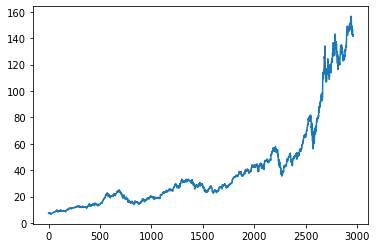

In [6]:
plt.plot(df.Close)

In [7]:
df

,Date,High,Low,Open,Close,Volume
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...,...
2953,2021-09-24,147.470001,145.559998,145.660004,146.919998,53477900.0
2954,2021-09-27,145.960007,143.820007,145.470001,145.369995,74150700.0
2955,2021-09-28,144.750000,141.690002,143.250000,141.910004,108972300.0
2956,2021-09-29,144.449997,142.029999,142.470001,142.830002,74602000.0


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2953    139.8504
2954    140.0231
2955    140.1448
2956    140.2710
2957    140.4175
Name: Close, Length: 2958, dtype: float64

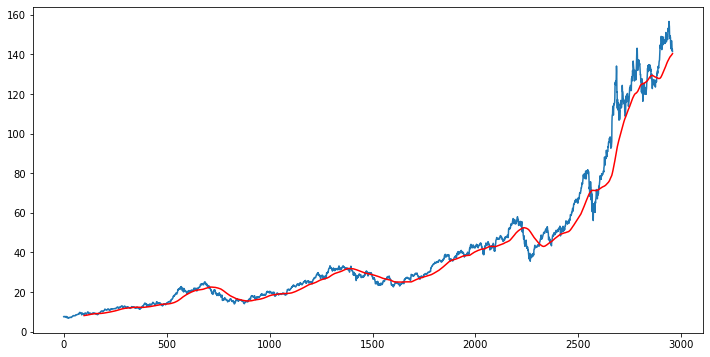

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2953    134.52305
2954    134.64100
2955    134.73435
2956    134.83645
2957    134.93505
Name: Close, Length: 2958, dtype: float64

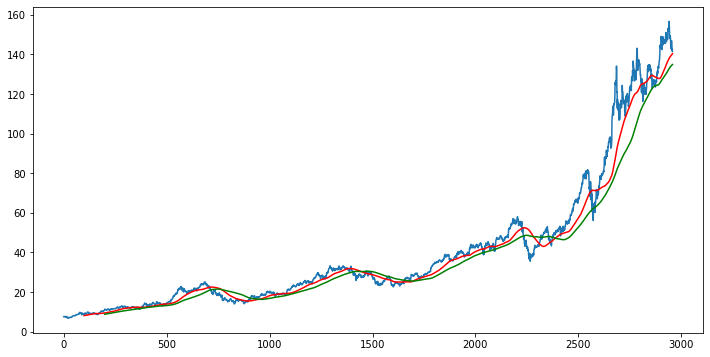

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(2958, 6)

In [13]:
# Splitting Data into Training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2070, 1)
(888, 1)


In [14]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [15]:
data_testing.head()

,Close
2070,41.235001
2071,43.192501
2072,42.084999
2073,41.619999
2074,41.945000


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01729643],
       [0.02033351],
       [0.02067611],
       ...,
       [0.95799964],
       [0.93226791],
       [0.91658259]])

In [18]:
data_training_array.shape


(2070, 1)

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train),  np.array(y_train)

In [20]:
x_train.shape

(1970, 100, 1)

In [21]:
# ML Model

In [22]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu', return_sequences = True, 
              input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))




model.add(LSTM(units = 60 , activation = 'relu', return_sequences = True ))
model.add(Dropout(0.3))





model.add(LSTM(units = 80 , activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 50 , activation = 'relu', ))
model.add(Dropout(0.5))




model.add(Dense(units= 1))   

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
62/62 [==============================] - 20s 201ms/step - loss: 0.0615
Epoch 2/50
62/62 [==============================] - 13s 214ms/step - loss: 0.0149
Epoch 3/50
62/62 [==============================] - 12s 199ms/step - loss: 0.0122
Epoch 4/50
62/62 [==============================] - 12s 199ms/step - loss: 0.0126
Epoch 5/50
62/62 [==============================] - 11s 184ms/step - loss: 0.0106
Epoch 6/50
62/62 [==============================] - 13s 206ms/step - loss: 0.0097
Epoch 7/50
62/62 [==============================] - 13s 205ms/step - loss: 0.0097
Epoch 8/50
62/62 [==============================] - 13s 208ms/step - loss: 0.0087
Epoch 9/50
62/62 [==============================] - 13s 206ms/step - loss: 0.0086
Epoch 10/50
62/62 [==============================] - 12s 197ms/step - loss: 0.0085
Epoch 11/50
62/62 [==============================] - 12s 200ms/step - loss: 0.0073
Epoch 12/50
62/62 [==============================] - 13s 204ms/step - loss: 0.0071
Epoch 13/50
6

In [26]:
model.save('keras_model.h5')

In [27]:
data_testing.head()

,Close
2070,41.235001
2071,43.192501
2072,42.084999
2073,41.619999
2074,41.945000


In [28]:
data_training.tail(100)

,Close
1970,40.762501
1971,41.680000
1972,42.259998
1973,41.722500
1974,42.027500
...,...
2065,44.505001
2066,43.825001
2067,43.810001
2068,42.817501


In [29]:
past_100_days = data_training.tail(100)

In [30]:
final_df=past_100_days.append(data_testing, ignore_index=True)

In [31]:
final_df.head()

,Close
0,40.762501
1,41.680000
2,42.259998
3,41.722500
4,42.027500


In [32]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.04304848],
       [0.0506222 ],
       [0.05540993],
       [0.05097302],
       [0.05349072],
       [0.0625503 ],
       [0.06616175],
       [0.0673174 ],
       [0.07026849],
       [0.06952556],
       [0.06702849],
       [0.06558392],
       [0.06015641],
       [0.0554925 ],
       [0.05966115],
       [0.05770062],
       [0.0573498 ],
       [0.06387105],
       [0.06762698],
       [0.0676476 ],
       [0.06583155],
       [0.06372661],
       [0.05631796],
       [0.06120891],
       [0.05955796],
       [0.05697835],
       [0.05664816],
       [0.05534802],
       [0.05598779],
       [0.05609095],
       [0.06290112],
       [0.06089934],
       [0.06207566],
       [0.06197247],
       [0.06558392],
       [0.07063994],
       [0.0667602 ],
       [0.06636813],
       [0.06773014],
       [0.06773014],
       [0.0585674 ],
       [0.05862931],
       [0.05961987],
       [0.05580204],
       [0.062055  ],
       [0.06199309],
       [0.06364405],
       [0.067

In [33]:
input_data.shape

(988, 1)

In [34]:
x_test =[]
y_test =[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])
    

In [35]:
x_test, y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(888, 100, 1)
(888,)


In [36]:
# Making Predictions


y_predicted = model.predict(x_test)

In [37]:
y_predicted.shape

(888, 1)

In [38]:
y_test

array([0.04694884, 0.0631075 , 0.05396536, 0.0501269 , 0.0528097 ,
       0.05053963, 0.05406855, 0.06071362, 0.06316941, 0.05404792,
       0.05749427, 0.06409806, 0.06242648, 0.06593474, 0.06715231,
       0.06940175, 0.07439586, 0.07357037, 0.06316941, 0.04855851,
       0.04756795, 0.04282147, 0.04428667, 0.04546298, 0.041542  ,
       0.0476092 , 0.05553378, 0.07094951, 0.07160987, 0.08593185,
       0.08867656, 0.09051324, 0.09321666, 0.09874732, 0.09575499,
       0.09484696, 0.09131807, 0.09490887, 0.09245311, 0.09104979,
       0.09377386, 0.09280393, 0.09528035, 0.09484696, 0.09573436,
       0.09433104, 0.09350558, 0.09220544, 0.09916008, 0.10244134,
       0.10549558, 0.10687825, 0.10580515, 0.10217305, 0.10120311,
       0.10336999, 0.10010936, 0.10031574, 0.09627091, 0.09606456,
       0.08977031, 0.09144189, 0.08929567, 0.08818126, 0.08250613,
       0.08717005, 0.08661287, 0.08937821, 0.08857337, 0.09284518,
       0.08611758, 0.08917182, 0.09447551, 0.09986173, 0.09938

In [39]:
y_predicted

array([[0.11964428],
       [0.11980057],
       [0.119766  ],
       [0.11956879],
       [0.1192199 ],
       [0.11873993],
       [0.1181556 ],
       [0.11749649],
       [0.11680761],
       [0.11613986],
       [0.11552003],
       [0.11495233],
       [0.11445361],
       [0.11404106],
       [0.11372247],
       [0.11350712],
       [0.11339855],
       [0.1134021 ],
       [0.11352301],
       [0.1137439 ],
       [0.11400372],
       [0.1142242 ],
       [0.11434433],
       [0.11432225],
       [0.11414745],
       [0.11382484],
       [0.11337316],
       [0.11284062],
       [0.11230302],
       [0.11184591],
       [0.1115357 ],
       [0.1114386 ],
       [0.11159417],
       [0.11202261],
       [0.11273175],
       [0.1137149 ],
       [0.11493793],
       [0.11634931],
       [0.11789078],
       [0.11950895],
       [0.12114686],
       [0.12275898],
       [0.12431222],
       [0.12578303],
       [0.12715918],
       [0.12843558],
       [0.12960947],
       [0.130

In [40]:
scaler.scale_

array([0.00825474])

In [41]:
scale_factor= 1/0.00825474
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

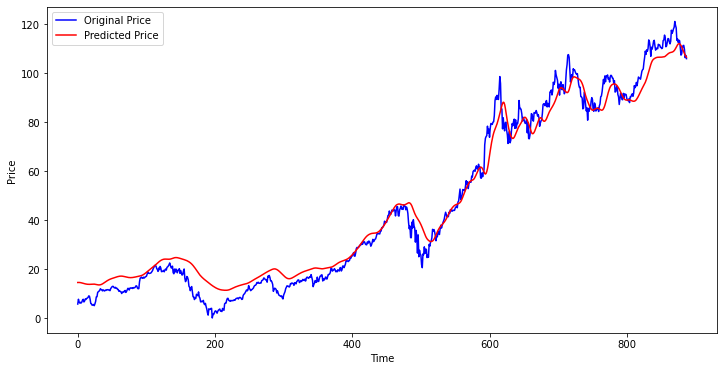

In [43]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label= 'Original Price')
plt.plot(y_predicted,'r', label='Predicted Price')
plt.xlabel('Time')

plt.ylabel('Price')
plt.legend()
plt.show()